# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

┌ Warning: x_tol is deprecated. Use x_abstol or x_reltol instead. The provided value (-1) will be used as x_abstol.
└ @ Optim ~/.julia/packages/Optim/7krni/src/types.jl:110
┌ Warning: f_tol is deprecated. Use f_abstol or f_reltol instead. The provided value (-1) will be used as f_reltol.
└ @ Optim ~/.julia/packages/Optim/7krni/src/types.jl:120
n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.04230948123                   -1.41    1.64s
  2   +18.50334475520        0.93       -0.84   10.4ms
  3   +12.19573080169        0.80       -0.48   10.3ms
  4   +11.39543647130       -0.10       -0.57   8.32ms
  5   +10.17866359949        0.09       -0.80   8.20ms
  6   +9.434893106410       -0.13       -0.82   8.18ms
  7   +8.943801429306       -0.31       -0.81   8.18ms
  8   +8.471020524538       -0.33       -0.90   8.21ms
  9   +8.114126205281       -0.45       -0.91   8.20ms
 10   +7.986188547854       -0.89       -1.04   8.

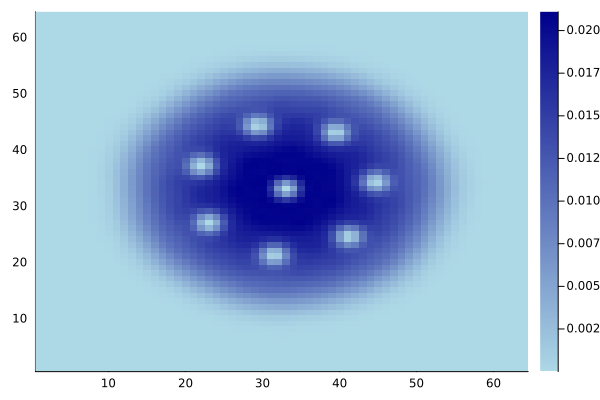

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)